In [57]:
import sys
from pathlib import Path

# Ubicación del notebook
NOTEBOOK_DIR = Path.cwd()

# Raíz del proyecto = subir un nivel desde Notebooks/
PROJECT_ROOT = NOTEBOOK_DIR.parent

# Añadir raíz del proyecto al sys.path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Proyecto raíz detectado:", PROJECT_ROOT)

Proyecto raíz detectado: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from utils.paths import DATA_DIR, FIG_DIR
from utils.loader import load_csv


# Importar funciones del modelo LSTM
from models.lstm_model import (
    train_and_predict_lstm
)



In [59]:
"""Establecemos los directorios de datos y figuras"""

MODELS_DIR = PROJECT_ROOT / "models_results"
LSTM_RESULTS_DIR = MODELS_DIR / "lstm"
LSTM_FIG_DIR = FIG_DIR / "lstm_fig_results"

LSTM_PRICE_DIR = LSTM_RESULTS_DIR / "price_predictions"
LSTM_RETURNS_DIR = LSTM_RESULTS_DIR / "returns_predictions"

LSTM_PRICE_FIG_DIR = LSTM_FIG_DIR / "price_figures"
LSTM_RETURNS_FIG_DIR = LSTM_FIG_DIR / "returns_figures"
LSTM_REPORTS_DIR = LSTM_RESULTS_DIR / "reports"

# Crear directorios si no existen
LSTM_RESULTS_DIR.mkdir(parents=True, exist_ok=True)
LSTM_FIG_DIR.mkdir(parents=True, exist_ok=True)

LSTM_PRICE_DIR.mkdir(parents=True, exist_ok=True)
LSTM_RETURNS_DIR.mkdir(parents=True, exist_ok=True)

LSTM_PRICE_FIG_DIR.mkdir(parents=True, exist_ok=True)
LSTM_RETURNS_FIG_DIR.mkdir(parents=True, exist_ok=True)
LSTM_REPORTS_DIR.mkdir(parents=True, exist_ok=True)

print("Directorios de resultados y figuras configurados")

Directorios de resultados y figuras configurados


In [60]:
"""Cargar los datos"""

prices = load_csv(DATA_DIR / "time_series" / "prices.csv")
prices = prices.set_index("date")
prices.index = pd.to_datetime(prices.index)

returns = load_csv(DATA_DIR / "time_series" / "returns.csv")
returns = returns.set_index("date")
returns.index = pd.to_datetime(returns.index)

tickers = [t for t in prices.columns if t.lower() != "date"]
len(prices), tickers
print(prices.head())
print(returns.head())

                BTC-USD    EUNL.DE         QQQ       TSLA           V  \
date                                                                    
2017-11-09  7143.580078  44.970001  145.739334  20.199333  105.904991   
2017-11-10  6618.140137  44.880001  145.729904  20.199333  105.659477   
2017-11-13  6559.490234  44.820000  145.910080  21.026667  105.206139   
2017-11-14  6635.750000  44.310001  145.379074  20.580000  105.753922   
2017-11-15  7315.540039  44.080002  144.696228  20.753332  104.120087   

                   VOO        XAR   XRP-USD  
date                                         
2017-11-09  207.974579  76.190742  0.217488  
2017-11-10  207.851807  75.530861  0.206483  
2017-11-13  208.097382  74.880341  0.203442  
2017-11-14  207.588806  75.002907  0.209825  
2017-11-15  206.527786  74.474983  0.212956  
             BTC-USD   EUNL.DE       QQQ      TSLA         V       VOO  \
date                                                                     
2017-11-10 -0.0735

In [61]:
ticker = [t for t in prices.columns if t.lower() != "date"]  

series_price = prices[ticker].dropna()
series_ret   = returns[ticker].dropna()

print(f"{ticker} - Len precios:", len(series_price))
print(f"{ticker} - Len retornos:", len(series_ret))
ticker


['BTC-USD', 'EUNL.DE', 'QQQ', 'TSLA', 'V', 'VOO', 'XAR', 'XRP-USD'] - Len precios: 1931
['BTC-USD', 'EUNL.DE', 'QQQ', 'TSLA', 'V', 'VOO', 'XAR', 'XRP-USD'] - Len retornos: 1930


['BTC-USD', 'EUNL.DE', 'QQQ', 'TSLA', 'V', 'VOO', 'XAR', 'XRP-USD']

In [64]:
config_lstm = {
    "lookback": 60,
    "units": 64,
    "dropout": 0.2,
    "batch_size": 32,
    "epochs": 60,
    "learning_rate": 0.001,
}

print("Configuración LSTM cargada:")
config_lstm
all_results_price = {}
all_results_ret = {}


Configuración LSTM cargada:


In [65]:
for ticker in tickers:
    print(f"\nEntrenando modelo LSTM para precios — {ticker}")
    
    series_price = prices[ticker].dropna()

    y_true_p, preds_p, results_p, history_p = train_and_predict_lstm(
        series_price,
        config_lstm,
        test_size=30
    )

    # Guardamos resultados sin guardarlos en disco aún
    all_results_price[ticker] = {
        "y_true": y_true_p,
        "preds": preds_p,
        "series": series_price
    }



Entrenando modelo LSTM para precios — BTC-USD

Entrenando modelo LSTM para precios — EUNL.DE

Entrenando modelo LSTM para precios — QQQ

Entrenando modelo LSTM para precios — TSLA

Entrenando modelo LSTM para precios — V

Entrenando modelo LSTM para precios — VOO

Entrenando modelo LSTM para precios — XAR

Entrenando modelo LSTM para precios — XRP-USD



 Generando gráfica de precios para BTC-USD 


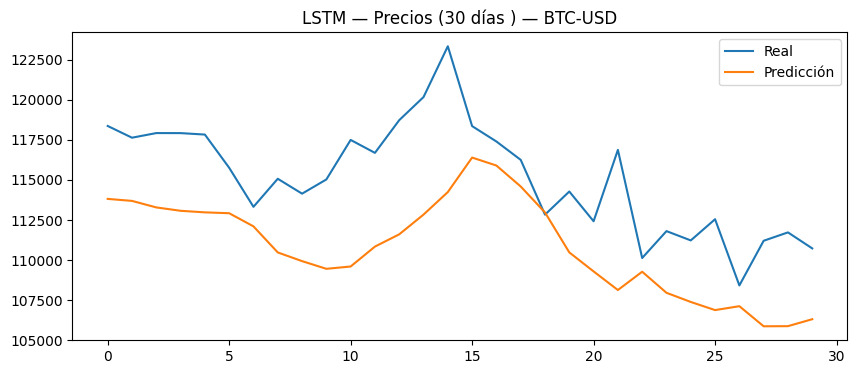

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\BTC-USD_lstm_price.png

 Generando gráfica de precios para EUNL.DE 


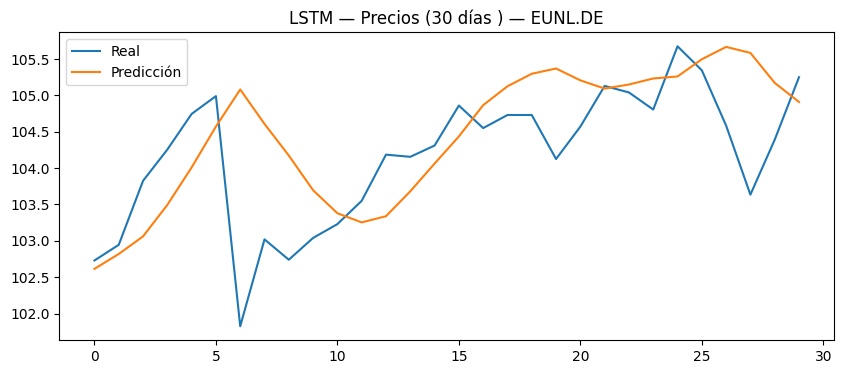

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\EUNL.DE_lstm_price.png

 Generando gráfica de precios para QQQ 


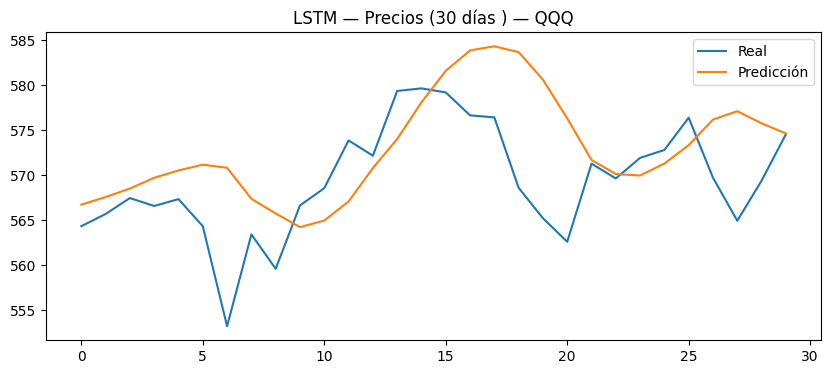

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\QQQ_lstm_price.png

 Generando gráfica de precios para TSLA 


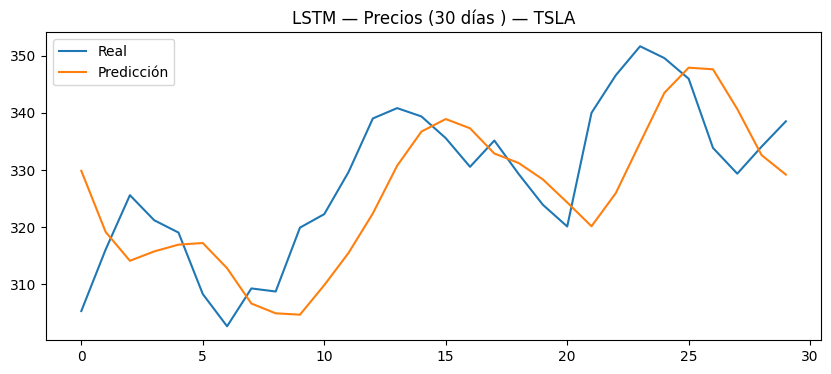

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\TSLA_lstm_price.png

 Generando gráfica de precios para V 


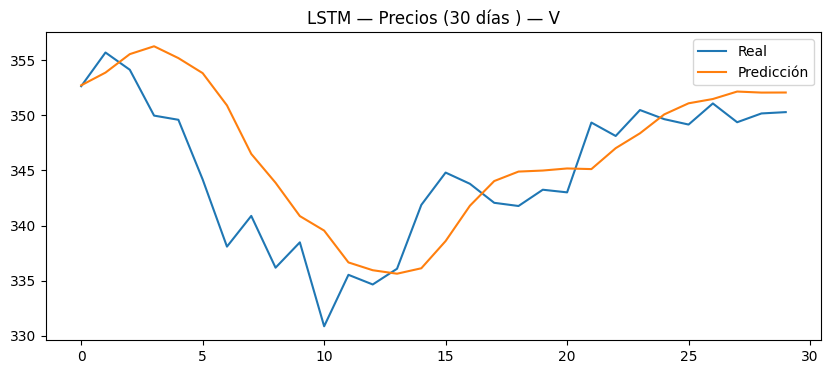

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\V_lstm_price.png

 Generando gráfica de precios para VOO 


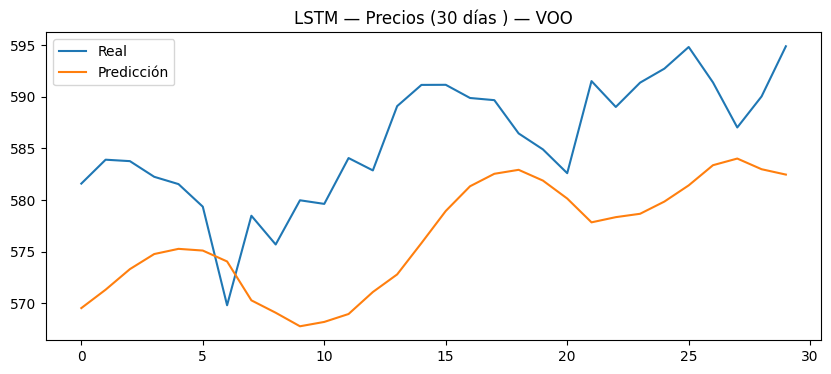

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\VOO_lstm_price.png

 Generando gráfica de precios para XAR 


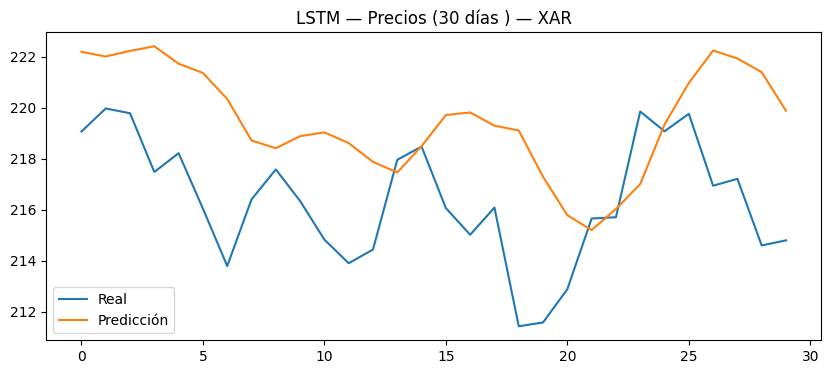

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\XAR_lstm_price.png

 Generando gráfica de precios para XRP-USD 


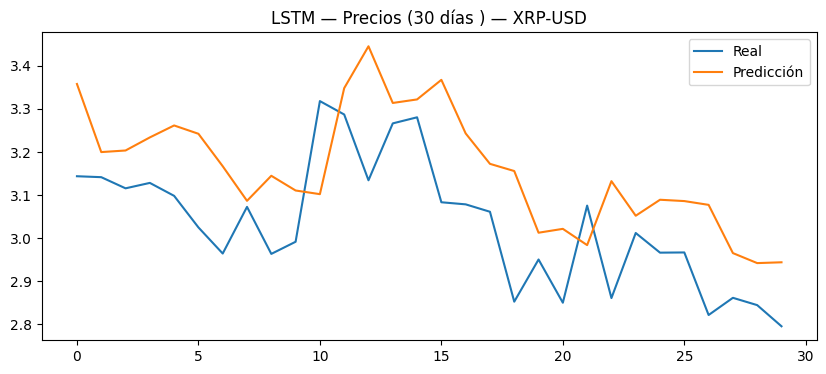

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\price_figures\XRP-USD_lstm_price.png


In [66]:
for ticker in tickers:

    print(f"\n Generando gráfica de precios para {ticker} ")

    # Recuperar datos ya entrenados
    y_true_p = all_results_price[ticker]["y_true"]
    preds_p  = all_results_price[ticker]["preds"]

    
    plt.figure(figsize=(10,4))
    plt.plot(y_true_p, label="Real")
    plt.plot(preds_p, label="Predicción")
    plt.title(f"LSTM — Precios (30 días ) — {ticker}")
    plt.legend()

    save_path = LSTM_PRICE_FIG_DIR / f"{ticker}_lstm_price.png"
    plt.savefig(save_path)
    plt.show()

    print("Figura guardada en:", save_path)




In [67]:
for ticker in tickers:

    print(f"\nGuardando predicciones para {ticker} ")

    # Recuperar los valores ya calculados del diccionario
    y_true_p = all_results_price[ticker]["y_true"]
    preds_p  = all_results_price[ticker]["preds"]
    series_price = all_results_price[ticker]["series"]

    price_preds_df = pd.DataFrame({
        "date": series_price.index[-30:],
        "real": y_true_p,
        "pred": preds_p
    })

    save_path = LSTM_PRICE_DIR / f"{ticker}_lstm_price_preds.csv"
    price_preds_df.to_csv(save_path, index=False)

    print("Predicciones de precios guardadas en:", save_path)




Guardando predicciones para BTC-USD 
Predicciones de precios guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\price_predictions\BTC-USD_lstm_price_preds.csv

Guardando predicciones para EUNL.DE 
Predicciones de precios guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\price_predictions\EUNL.DE_lstm_price_preds.csv

Guardando predicciones para QQQ 
Predicciones de precios guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\price_predictions\QQQ_lstm_price_preds.csv

Guardando predicciones para TSLA 
Predicciones de precios guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\price_predictions\TSLA_lstm_price_preds.csv

Guardando predicciones para V 
Predicciones de precios guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\price_predictions\V_lstm_price_preds.csv

Guardando 

In [68]:
for ticker in tickers:
    print(f"\nEntrenando modelo LSTM para retornos — {ticker}")
    
    series_ret  = returns[ticker].dropna()

    y_true_r, preds_r, results_r, history_r = train_and_predict_lstm(
        series_ret,
        config_lstm,
        test_size=30
    )

    # Guardamos resultados sin guardarlos en disco aún
    all_results_ret[ticker] = {
        "y_true": y_true_r,
        "preds": preds_r,
        "series": series_ret
    }


Entrenando modelo LSTM para retornos — BTC-USD

Entrenando modelo LSTM para retornos — EUNL.DE

Entrenando modelo LSTM para retornos — QQQ

Entrenando modelo LSTM para retornos — TSLA

Entrenando modelo LSTM para retornos — V

Entrenando modelo LSTM para retornos — VOO

Entrenando modelo LSTM para retornos — XAR

Entrenando modelo LSTM para retornos — XRP-USD



 Generando gráfica de retornos para BTC-USD 


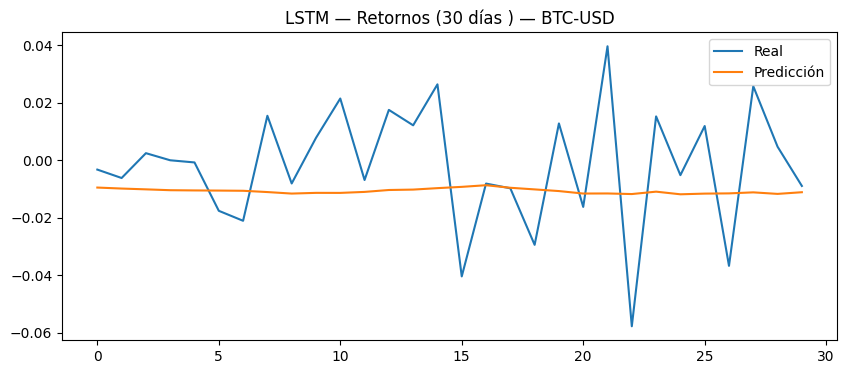

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\BTC-USD_lstm_returns.png

 Generando gráfica de retornos para EUNL.DE 


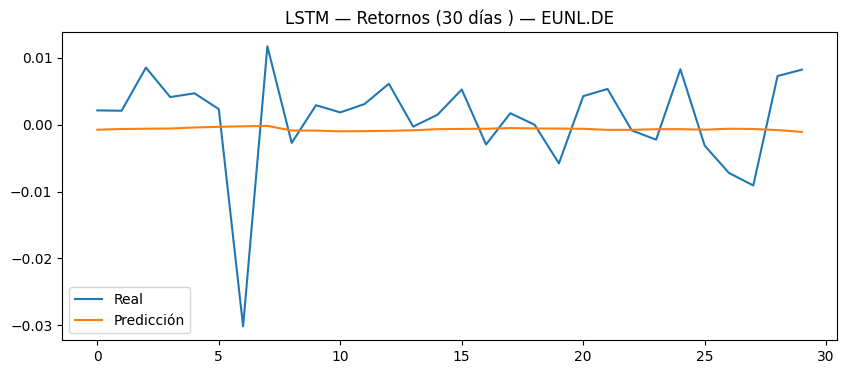

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\EUNL.DE_lstm_returns.png

 Generando gráfica de retornos para QQQ 


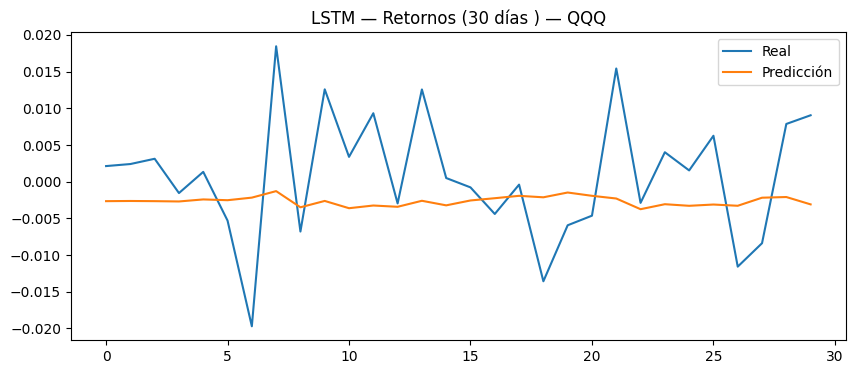

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\QQQ_lstm_returns.png

 Generando gráfica de retornos para TSLA 


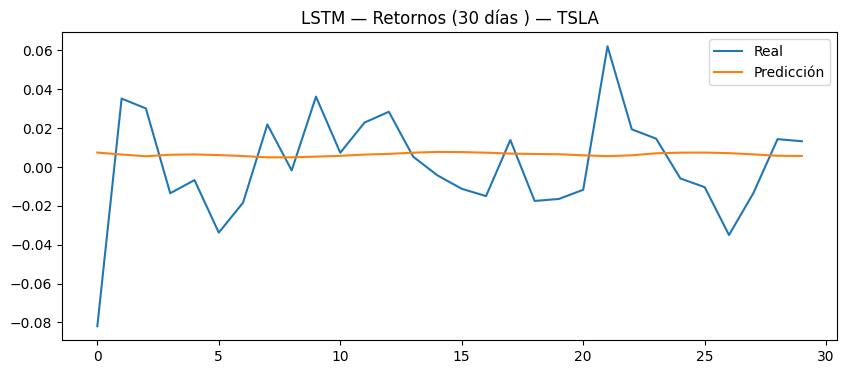

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\TSLA_lstm_returns.png

 Generando gráfica de retornos para V 


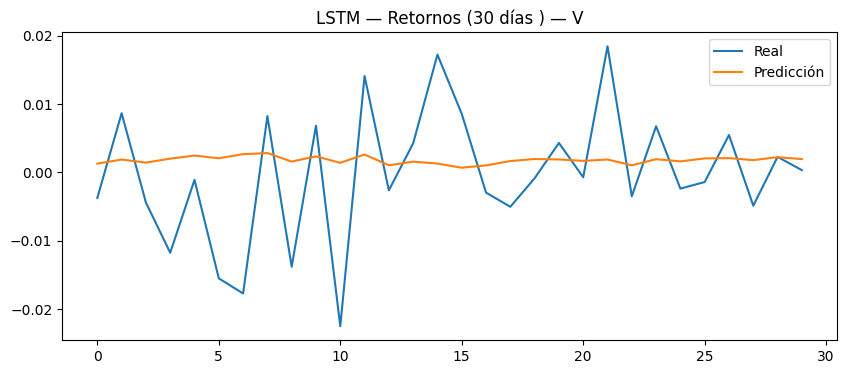

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\V_lstm_returns.png

 Generando gráfica de retornos para VOO 


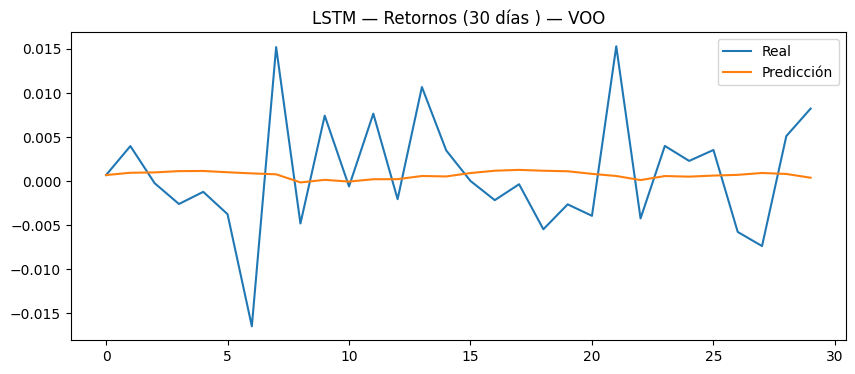

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\VOO_lstm_returns.png

 Generando gráfica de retornos para XAR 


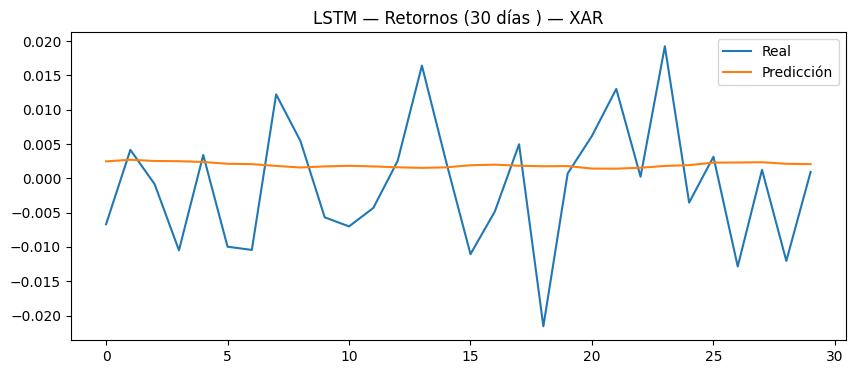

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\XAR_lstm_returns.png

 Generando gráfica de retornos para XRP-USD 


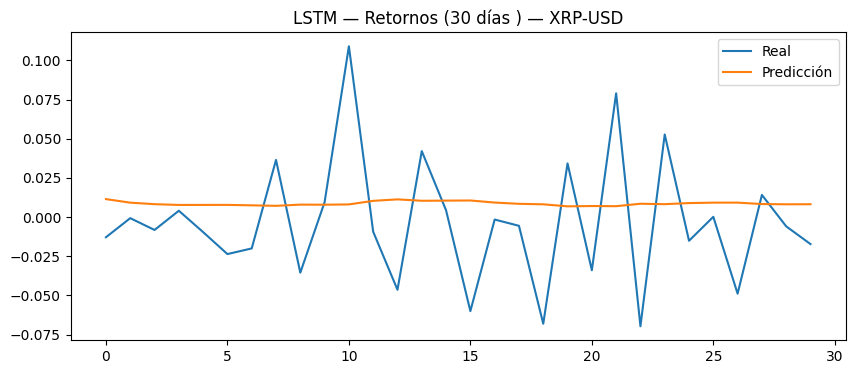

Figura guardada en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\lstm_fig_results\returns_figures\XRP-USD_lstm_returns.png


In [69]:
for ticker in tickers:

    print(f"\n Generando gráfica de retornos para {ticker} ")

    # Recuperar datos ya entrenados
    y_true_r = all_results_ret[ticker]["y_true"]
    preds_r  = all_results_ret[ticker]["preds"]

    plt.figure(figsize=(10,4))
    plt.plot(y_true_r, label="Real")
    plt.plot(preds_r, label="Predicción")
    plt.title(f"LSTM — Retornos (30 días ) — {ticker}")
    plt.legend()

    save_path = LSTM_RETURNS_FIG_DIR / f"{ticker}_lstm_returns.png"
    plt.savefig(save_path)
    plt.show()

    print("Figura guardada en:", save_path)


In [70]:
for ticker in tickers:

    print(f"\n Guardando predicciones de RETORNOS para {ticker} ")

    # Recuperar valores ya calculados
    y_true_r = all_results_ret[ticker]["y_true"]
    preds_r  = all_results_ret[ticker]["preds"]
    series_ret = all_results_ret[ticker]["series"]

    returns_preds_df = pd.DataFrame({
        "date": series_ret.index[-30:],
        "real": y_true_r,
        "pred": preds_r
    })

    save_path = LSTM_RETURNS_DIR / f"{ticker}_lstm_returns_preds.csv"
    returns_preds_df.to_csv(save_path, index=False)

    print("Predicciones de retornos guardadas en:", save_path)




 Guardando predicciones de RETORNOS para BTC-USD 
Predicciones de retornos guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\returns_predictions\BTC-USD_lstm_returns_preds.csv

 Guardando predicciones de RETORNOS para EUNL.DE 
Predicciones de retornos guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\returns_predictions\EUNL.DE_lstm_returns_preds.csv

 Guardando predicciones de RETORNOS para QQQ 
Predicciones de retornos guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\returns_predictions\QQQ_lstm_returns_preds.csv

 Guardando predicciones de RETORNOS para TSLA 
Predicciones de retornos guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\returns_predictions\TSLA_lstm_returns_preds.csv

 Guardando predicciones de RETORNOS para V 
Predicciones de retornos guardadas en: c:\Users\cathe\Didier Jesus\EduFinance\EduFina

In [71]:
for t in tickers:
    report_path = LSTM_REPORTS_DIR / f"{t}_lstm_report.txt"

    with open(report_path, "w") as f:
        f.write(f"Reporte LSTM — {t}\n")
        f.write("="*50 + "\n\n")

        f.write("MODELO DE PRECIOS\n")
        for k, v in all_results_price[t].items():
            if k not in ["ticker", "type"]:
                f.write(f"{k}: {v}\n")

        f.write("\nMODELO DE RETORNOS\n")
        for k, v in all_results_ret[t].items():
            if k not in ["ticker", "type"]:
                f.write(f"{k}: {v}\n")

    print("Reporte guardado en:", report_path)



Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\BTC-USD_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\EUNL.DE_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\QQQ_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\TSLA_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\V_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\VOO_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_results\lstm\reports\XAR_lstm_report.txt
Reporte guardado en: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\models_re